# Stationairty
*How to select p, d, & q?*

- In general, selecting hyperparameters isn't easy 
- Usually, there is no formula - Have to rely on trial and error to get values.
- Machine Learning is a science - requiring experimentation, not philosophy.
- HOWEVER, for ARIMA, there is a "method" to select p, d, & q.
    - **Stationarity**

## Practical explanation os stationarity

- Loosely, the distribution of the random variables in the time series does not change over time.
    - E.g. mean and variance will always be the same 
- Stock returns exhibit volatility clustering, but CAN (sometimes) be assumed to be stationary.

## Testing for stationarity

- Augmented Dickey-Fuller Test (ADF Test)
- Think of it like an API:
    - Given: null hypothesis, alternative hypothesis
    - Input: time series, Output: p-value
    - Action: accept/reject the null hypothesis

- For ADF Test:
    - Null: time series is non-stationary
    - Alternative: time series is stationary
        - If `p-value < 5%` we can say the time series IS stationary (and reject the Null hypothesis)

### To use the ADF Test to select *d*
- Keep differencing until the result is stationary (check using ADF).

ie:
```
d = 0
Is it stationary? -> yes -> Apply ARMA(p, q, d=d)
|
no
|
Apply differencing (d += 1) -> Is it stationary?
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

<AxesSubplot:xlabel='Month'>

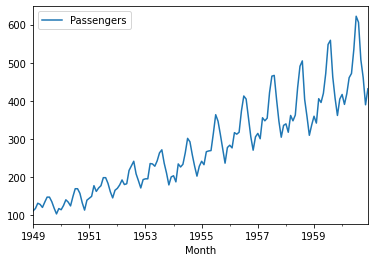

In [2]:
df = pd.read_csv("../airline_passengers.csv", index_col="Month", parse_dates=True)
df.plot()

In [3]:
# Test the adfuller func on Passengers
# Returns (adf, pvalue, usedlag, nobs, critical values, icbest)
# The ADF (test statistic) and pvalue are most important for us!

adfuller(df['Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [4]:
def adf_interpreter(data):
    """A function to assist in interpreting the ADF returned results 
    performed on the data. 
    data: ex: df['Passengers']
    """
    result = adfuller(data)
    print("Test-Statistic:", result[0])
    print("P-Value:", result[1])
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [5]:
# Test the above function on df

adf_interpreter(df['Passengers'])

Test-Statistic: 0.8153688792060433
P-Value: 0.9918802434376409
Non-Stationary


In [6]:
# Test function on stationary data

adf_interpreter(np.random.randn(100))

Test-Statistic: -3.1792723330545165
P-Value: 0.02121626704937272
Stationary


In [7]:
adf_interpreter(np.random.gamma(1, 1, 100))

Test-Statistic: -8.15699389242509
P-Value: 9.361904520150054e-13
Stationary


In [13]:
# Test function on LogPassengers

df['LogPassengers'] = np.log(df['Passengers'])
adf_interpreter(df['LogPassengers'])

Test-Statistic: -1.717017089106963
P-Value: 0.4223667747703902
Non-Stationary


Text(0.5, 1.0, 'Since the variance of the difference appears to grow overtime,\nwe assume the data is non-stationary.')

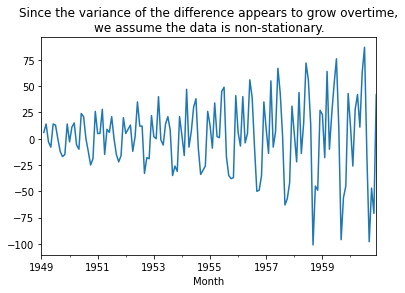

In [15]:
# Difference the passengers column for the ARIMA (fit function) and plot

df['Diff'] = df['Passengers'].diff()
df['Diff'].plot()
plt.title("Since the variance of the difference appears to grow overtime,\nwe assume the data is non-stationary.")

In [16]:
# Test the Diff column with ADF (Note how close the p-value is to being "stationary")

adf_interpreter(df['Diff'].dropna())

Test-Statistic: -2.8292668241699954
P-Value: 0.05421329028382609
Non-Stationary


Text(0.5, 1.0, 'The variance of the LogPassengers appears to be much\ncloser to stationary than above.')

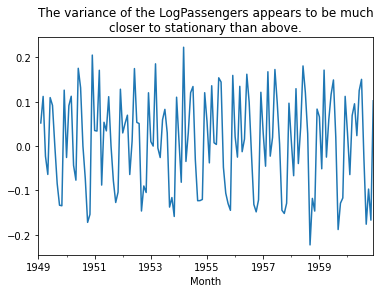

In [18]:
# Apply Differencing of the LogPassengers 

df['DiffLog'] = df['LogPassengers'].diff()
df['DiffLog'].plot()
plt.title("The variance of the LogPassengers appears to be much\ncloser to stationary than above.")

In [19]:
# Perform ADF Test on the LogDiff (Note: the p-value is higher on this set of data than above).

adf_interpreter(df['DiffLog'].dropna())

Test-Statistic: -2.717130598388118
P-Value: 0.07112054815086118
Non-Stationary


# Testing Stationarity on Stock Data

In [20]:
stocks = pd.read_csv("../sp500sub.csv", index_col='Date', parse_dates=True)
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [25]:
# Defining the LogPrice and LogReturns for GOOG
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

goog['LogPrice'] = np.log(goog['Close'])
goog['LogRet'] = goog['LogPrice'].diff()

Text(0.5, 1.0, 'GOOG LogPrice\nNote the clear trend.')

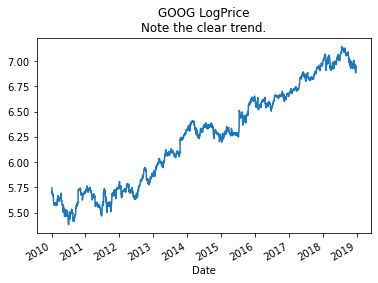

In [28]:
goog['LogPrice'].plot()
plt.title("GOOG LogPrice\nNote the clear trend.")

Text(0.5, 1.0, 'GOOG LogReturns\nNote the appearance of stationarity (maybe)')

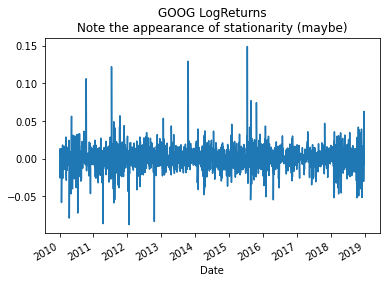

In [29]:
goog['LogRet'].plot()
plt.title("GOOG LogReturns\nNote the appearance of stationarity (maybe)")

In [31]:
# ADF Test the LogPrice and LogRet data

adf_interpreter(goog['LogPrice'])

Test-Statistic: -0.4181902578906113
P-Value: 0.907017067749841
Non-Stationary


In [33]:
adf_interpreter(goog['LogRet'].dropna())

Test-Statistic: -46.66748022773676
P-Value: 0.0
Stationary


### Same tests as above with GOOG but using SBUX for testing

In [34]:
sbux = stocks[stocks['Name'] == "SBUX"][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

<AxesSubplot:xlabel='Date'>

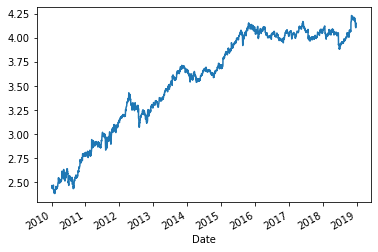

In [35]:
sbux['LogPrice'].plot()

<AxesSubplot:xlabel='Date'>

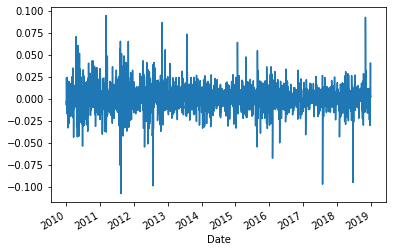

In [36]:
sbux['LogRet'].plot()

In [37]:
adf_interpreter(sbux['LogPrice'])

Test-Statistic: -1.9020133583900012
P-Value: 0.3311145569853755
Non-Stationary


In [39]:
adf_interpreter(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426958183
P-Value: 0.0
Stationary
